## Car, model, volume, weight, co2 emmission : a data set with higher dimensional
### Using ScieKit Learn
### This code reads the car data from the CSV file, extracts the features and target variable, creates a linear regression model using scikit-learn's LinearRegression class, fits the model to the data, predicts the CO2 emission for a specific car, and prints the coefficients of the linear regression model. I also solve the problem by Normalization equation and GD Regressor and plot the results

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Read the CSV file into a DataFrame
df = pd.read_csv("/home/ies/Desktop/ML/Machine_Learning_2018/2-Regression/data/car_co.csv")

# Extract features ('Weight' and 'Volume') and target variable ('CO2')
X = df[['Weight', 'Volume']]
y = df['CO2']

# Create a linear regression model
regr = linear_model.LinearRegression()

# Fit the model to the data
regr.fit(X, y)

# Predict the CO2 emission for a car with weight 2300kg and volume 1300cm3
predictedCO2 = regr.predict([[2300, 1300]])

print("Predicted CO2 emission:", predictedCO2[0])

# Display the coefficients of the linear regression model
print("Coefficients:", regr.coef_)





Predicted CO2 emission: 107.20873279892223
Coefficients: [0.00755095 0.00780526]


/home/ies/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Using Normalization and plotting the results

Theta: [[7.96947193e+01]
 [7.55094727e-03]
 [7.80525753e-03]]


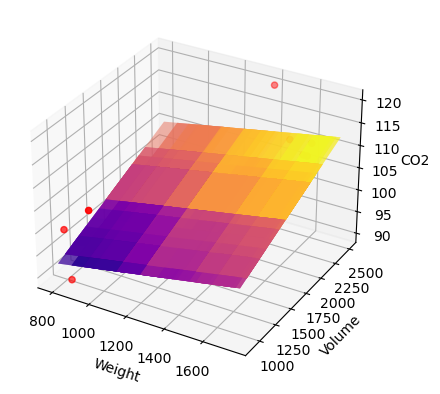

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from numpy.linalg import pinv  # pseudo Inverse

# Assuming your CSV file has columns 'Weight' and 'Volume'
file_path = "/home/ies/Desktop/ML/Machine_Learning_2018/2-Regression/data/car_co.csv"
df = pd.read_csv(file_path)

# Add a column of ones for the bias term
df['Bias'] = 1

# Extract the features and target variable
X = df[['Bias', 'Weight', 'Volume']]
y = df['CO2'].values.reshape(-1, 1)

# Calculate the parameters using the pseudo-inverse
theta = pinv(X) @ y

# Display the calculated parameters
print("Theta:", theta)

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Weight'], df['Volume'], df['CO2'], c='r', marker='o')

# Plot the regression plane
xx, yy = np.meshgrid(df['Weight'], df['Volume'])
zz = theta[0] + theta[1] * xx + theta[2] * yy
ax.plot_surface(xx, yy, zz, alpha=0.5, cmap='plasma')

# Add labels
ax.set_xlabel('Weight')
ax.set_ylabel('Volume')
ax.set_zlabel('CO2')

plt.show()



##Using gradient decent

/home/ies/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


[1.9658137  2.83142382]


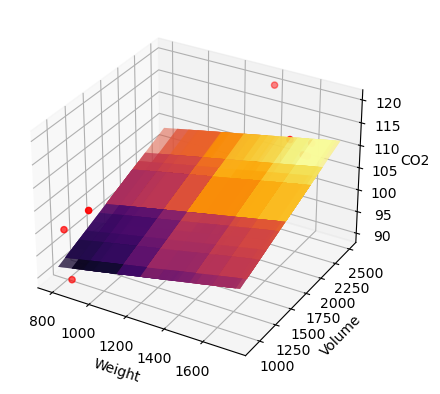

In [3]:
import pandas as pd
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

# Read the CSV file into a DataFrame
df = pd.read_csv("/home/ies/Desktop/ML/Machine_Learning_2018/2-Regression/data/car_co.csv")

# Extract features ('Weight' and 'Volume') and target variable ('CO2')
X = df[['Weight', 'Volume']]
y = df['CO2']

scale = StandardScaler()
X_normalized = scale.fit_transform(X)

gdreg = SGDRegressor(max_iter=1000, tol=5e-2)
gdreg.fit(X_normalized,y)

# Predict the amount of CO2
predicted_co = gdreg.predict(X_normalized)

# Reshape for consistency
predicted_co = predicted_co.reshape(-1, 1)

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Weight'], df['Volume'], df['CO2'], c='r', marker='o')

# Plot the regression plane
xx, yy = np.meshgrid(df['Weight'], df['Volume'])
zz = gdreg.intercept_ + np.dot(scale.transform(np.c_[xx.ravel(), yy.ravel()]), gdreg.coef_.T)
zz = zz.reshape(xx.shape)
print(gdreg.coef_)
ax.plot_surface(xx, yy, zz, alpha=0.5, cmap='inferno')

# Add labels
ax.set_xlabel('Weight')
ax.set_ylabel('Volume')
ax.set_zlabel('CO2')

plt.show()

##Using polynomial regression

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

plt.rcParams['figure.figsize'] = [18, 18]
# Read the CSV file into a DataFrame
df = pd.read_csv("/home/ies/Desktop/ML/Machine_Learning_2018/2-Regression/data/car_co.csv")

# Extract features ('Weight' and 'Volume') and target variable ('CO2')
X = df[['Weight', 'Volume']]
y = df['CO2']

In [5]:
def fit_poly(x, y, degree=1):
    
    # add polynomial features
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    
    # create and fit the model
    linear_regression = LinearRegression()
    model = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", linear_regression)])
    model.fit(x, y)
    return model

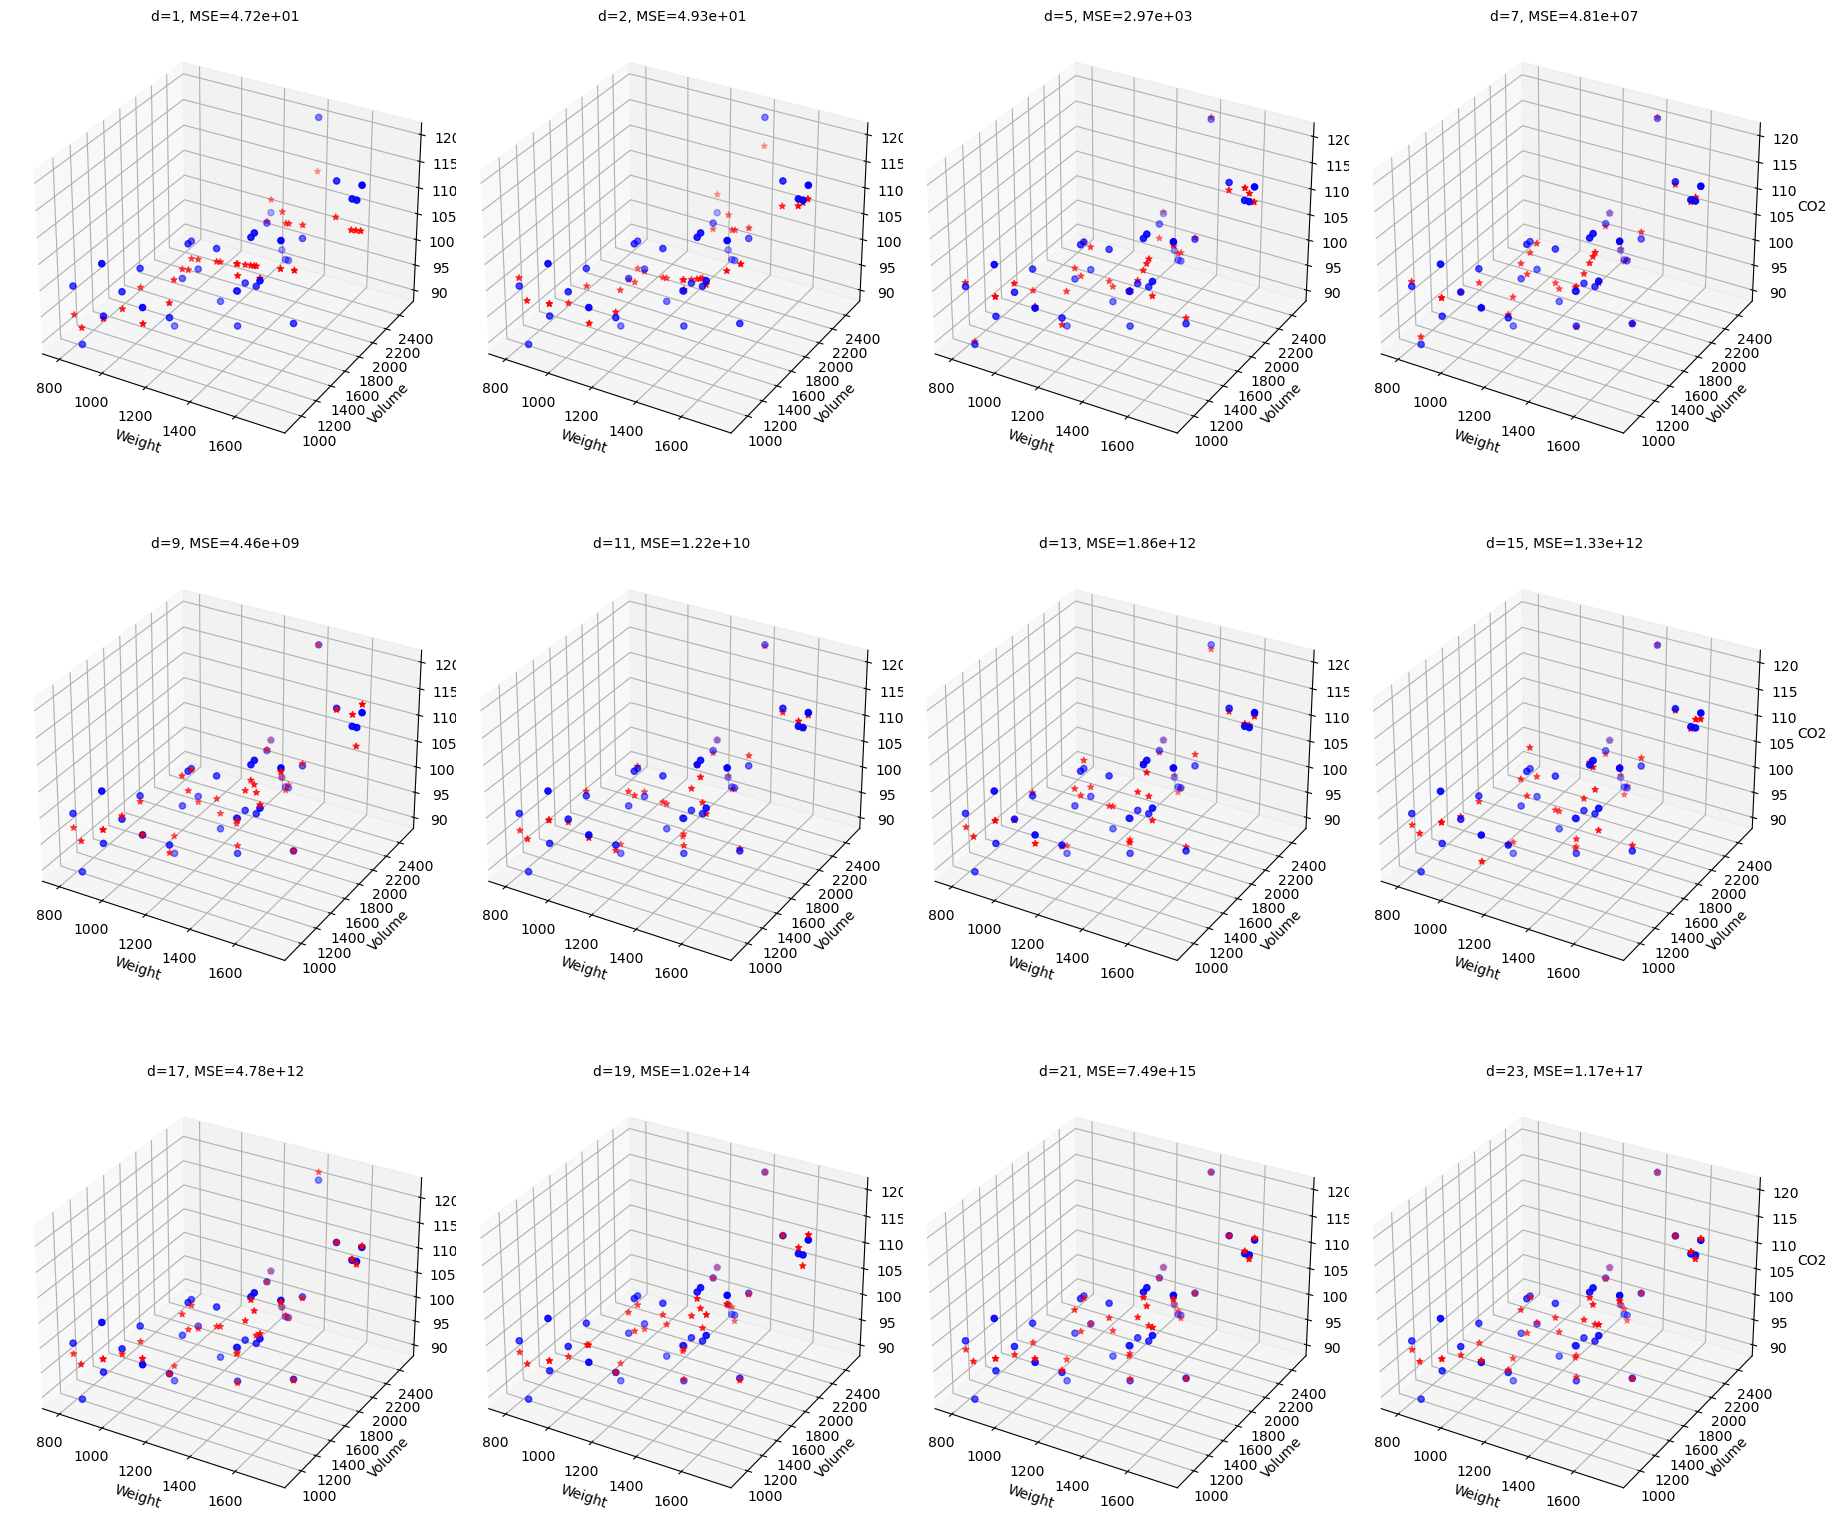

In [6]:
fig = plt.figure()
degrees = [ 1, 2, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23]   
for d in degrees:
    model = fit_poly(X, y, degree=d)
    scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=10)

    ax = fig.add_subplot(3, 4, degrees.index(d)+1, projection='3d')
    plt.tight_layout()
    ax.scatter(df['Weight'], df['Volume'], df['CO2'], c='b', marker='o')

    ax.scatter(df['Weight'], df['Volume'], model.predict(X), c='r', marker='*')

    plt.title("d={}, MSE={:.2e}".format(d, -scores.mean()), fontsize=10)

    # Add labels
    ax.set_xlabel('Weight')
    ax.set_ylabel('Volume')
    ax.set_zlabel('CO2')

plt.show()

### Using Ridge regulariztion to avoid overfitting

In [7]:
from sklearn.linear_model import Lasso, Ridge

def fit_poly_L2_reg(degree=1, lmbda=1.0):
    # add polynomial features
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    
    # create and fit the model
    linear_regression = Ridge(alpha=lmbda)
    model = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", linear_regression)])
    model.fit(X, y)
    return model

/home/ies/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.5098e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/home/ies/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.72075e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/home/ies/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.67188e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/home/ies/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.23558e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/home/ies/anaconda3/lib/python3.9/site-packages/sklearn/linear_mo

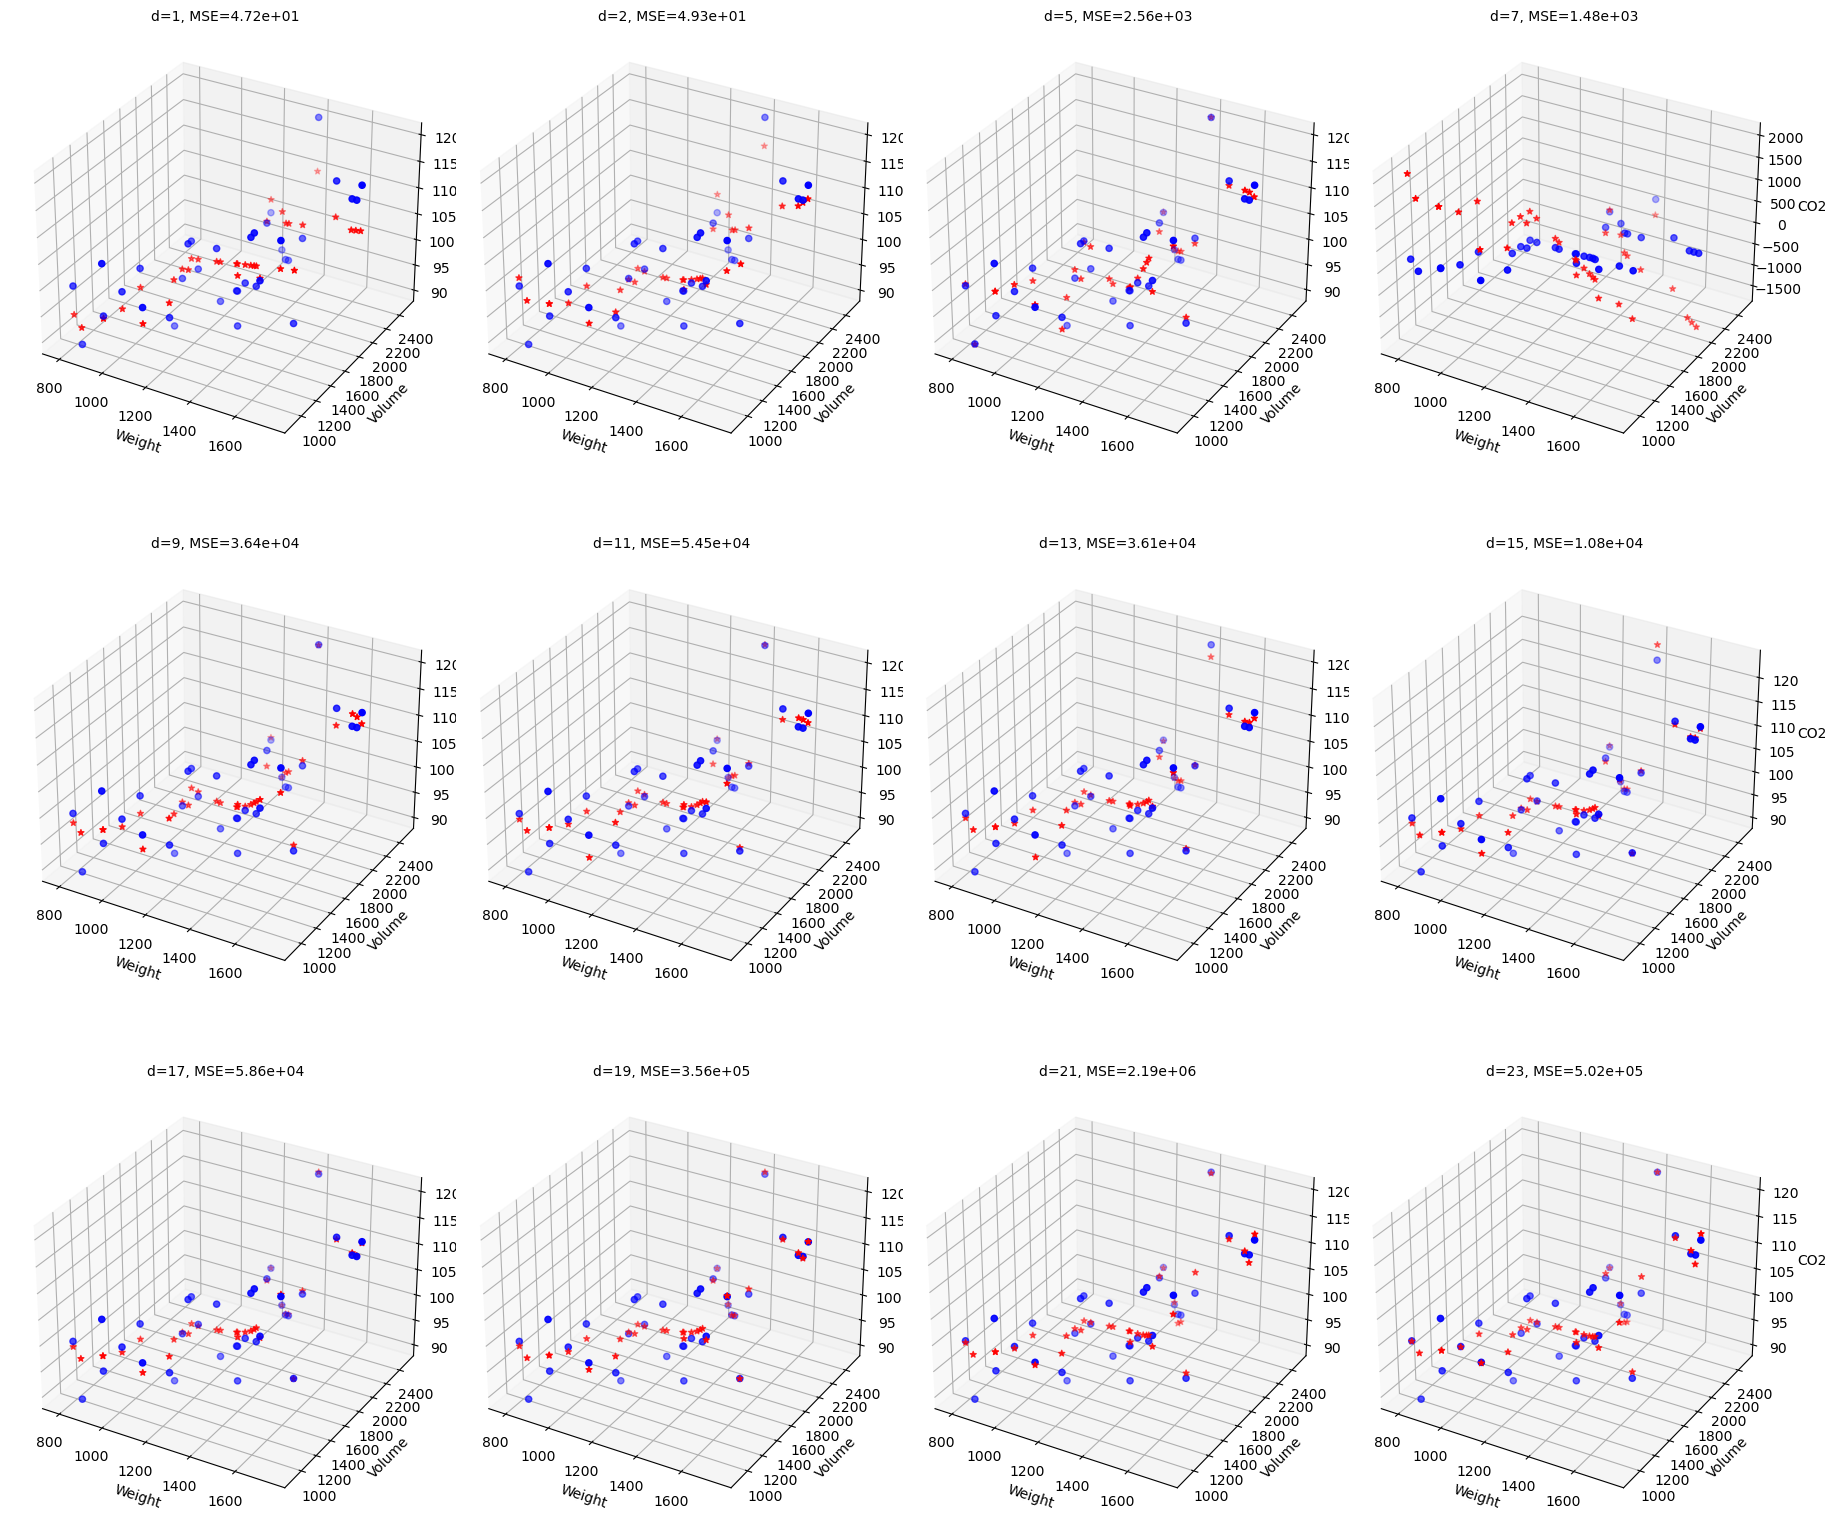

In [8]:
lmbda = 5e-2
fig = plt.figure()
    
for d in degrees:
    model = fit_poly_L2_reg(d,lmbda)
    scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=10)

    ax = fig.add_subplot(3, 4, degrees.index(d)+1, projection='3d')
    plt.tight_layout()
    ax.scatter(df['Weight'], df['Volume'], df['CO2'], c='b', marker='o')

    ax.scatter(df['Weight'], df['Volume'], model.predict(X), c='r', marker='*')

    plt.title("d={}, MSE={:.2e}".format(d, -scores.mean()), fontsize=10)

    # Add labels
    ax.set_xlabel('Weight')
    ax.set_ylabel('Volume')
    ax.set_zlabel('CO2')

plt.show()

### Using Lasso regularization

In [9]:
def fit_poly_L1_reg(degree=1, lmbda=1.0):
    # add polynomial features
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    
    # create and fit the model
    l1_reg = Lasso(alpha=lmbda)
    model = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", l1_reg)])
    model.fit(X, y)
    return model

/home/ies/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.506e+02, tolerance: 1.945e-01
  model = cd_fast.enet_coordinate_descent(
/home/ies/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.582e+02, tolerance: 1.666e-01
  model = cd_fast.enet_coordinate_descent(
/home/ies/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.39

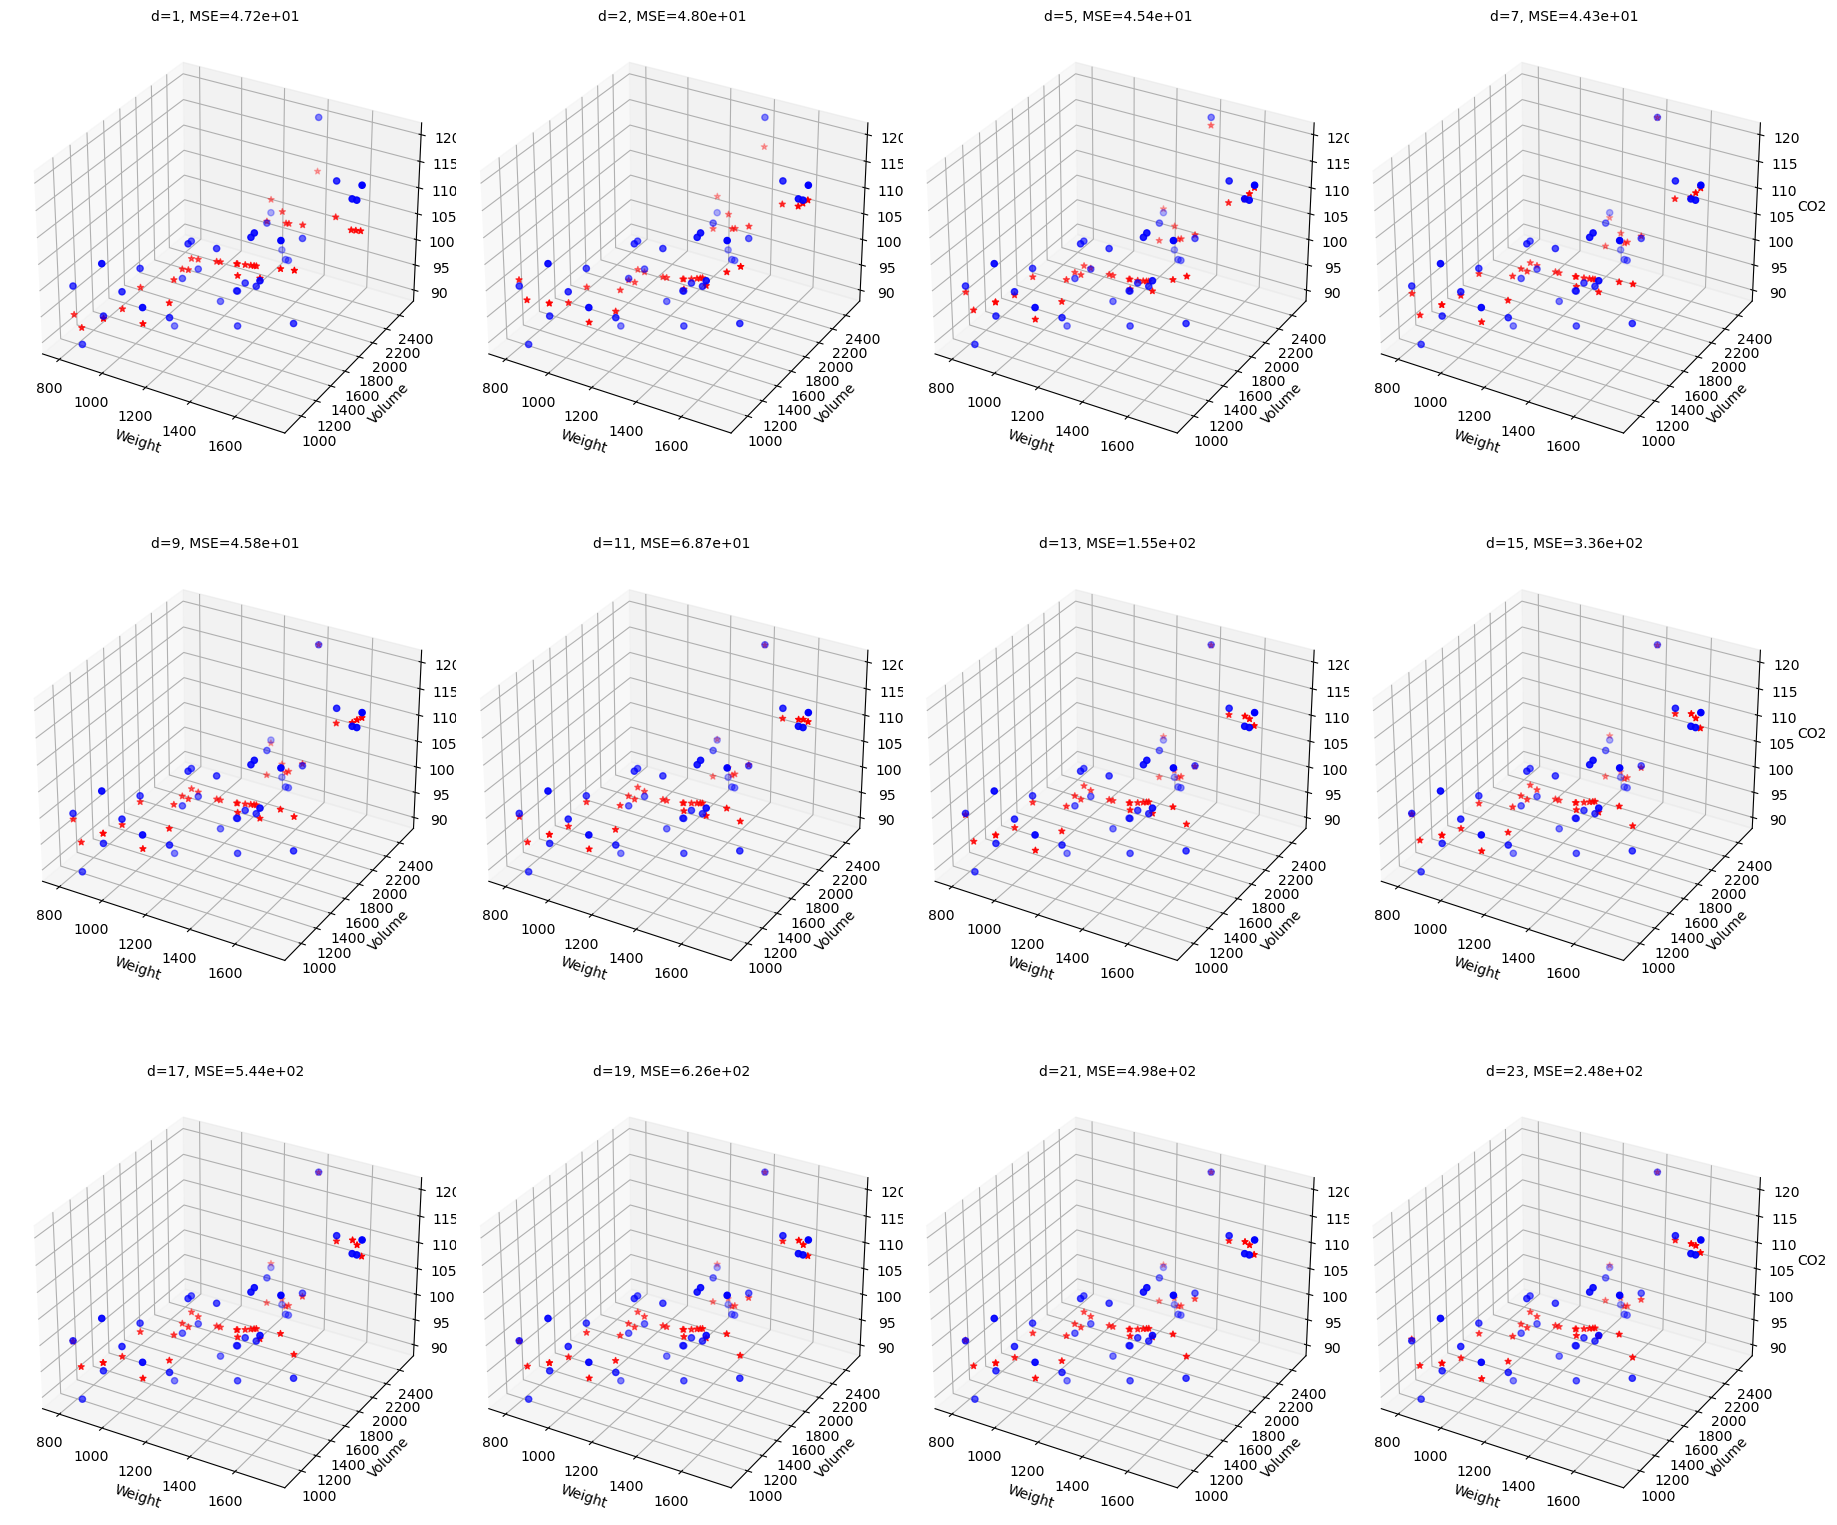

In [10]:
lmbda = 5e-2
fig = plt.figure()
    
for d in degrees:
    model = fit_poly_L1_reg(d,lmbda)
    scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=10)

    ax = fig.add_subplot(3, 4, degrees.index(d)+1, projection='3d')
    plt.tight_layout()
    ax.scatter(df['Weight'], df['Volume'], df['CO2'], c='b', marker='o')

    ax.scatter(df['Weight'], df['Volume'], model.predict(X), c='r', marker='*')

    plt.title("d={}, MSE={:.2e}".format(d, -scores.mean()), fontsize=10)

    # Add labels
    ax.set_xlabel('Weight')
    ax.set_ylabel('Volume')
    ax.set_zlabel('CO2')

plt.show()